In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# Cargar datos
path_datos = os.path.join('..','..','Datos','Limpios')
df2 = pd.read_csv(os.path.join(path_datos,'datos2_limpios.csv'), index_col=0)

df2_limpio = df2.drop(['Porcentaje Ahorro (%)', 'Ahorro Actual (€)', 'Gasto Mensual (€)',
                        'Vida Esperada (años)', 'Edad de Jubilación'], axis=1)

In [4]:
# Definir variables de entrada y salida
X = df2_limpio.drop(columns=['Años Hasta Jubilación'])
y = df2_limpio['Años Hasta Jubilación']


In [5]:
X

,Edad,Ingreso Anual (€)
0,32,29353.06
1,51,39218.38
2,32,15000.00
3,30,23517.91
4,60,20867.64
...,...,...
4995,58,23759.51
4996,46,15000.00
4997,51,23620.10
4998,61,15000.00


In [6]:
y

0       35
1       16
2       33
3       37
4        2
        ..
4995     7
4996    17
4997    12
4998     3
4999    25
Name: Años Hasta Jubilación, Length: 5000, dtype: int64

In [7]:

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.head()

,Edad,Ingreso Anual (€)
1840,37,58673.61
2115,34,15245.70
4437,29,17268.72
1146,24,56230.99
2486,62,42123.31


In [9]:
X_test.head()

,Edad,Ingreso Anual (€)
1501,28,37507.51
2586,62,19775.54
2653,43,15000.00
1055,32,34172.61
705,21,21840.79


In [10]:
y_train.head()

1840    28
2115    30
4437    35
1146    38
2486     5
Name: Años Hasta Jubilación, dtype: int64

In [11]:
y_test.head()

1501    36
2586     1
2653    20
1055    32
705     46
Name: Años Hasta Jubilación, dtype: int64

In [23]:
# Modelo con Random Forest
param_grid = {
    'n_estimators': [190, 200, 225],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=225,
                      random_state=0)

In [13]:
# Evaluar modelo
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, R2: {r2}')


MAE: 1.4876785609193537, R2: 0.9796407828181579


In [14]:
# Cargar nuevo dataset
df = pd.read_csv(os.path.join(path_datos, 'datos1_limpios.csv'), index_col=0)

In [15]:
df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49


In [16]:
X_2 = df.drop(['ID', 'FECHA NAC', 'SEXO', 'FECHA ENTRADA', 'PARA CONTAR MESES'], axis=1)

In [17]:
X_2.columns = ['Ingreso Anual (€)','Edad']
X_2 = X_2[['Edad','Ingreso Anual (€)']] 
X_2

,Edad,Ingreso Anual (€)
0,51,15319.07
1,30,19168.80
2,52,18719.86
3,50,12942.60
4,49,20158.08
...,...,...
95,50,25222.69
96,34,18759.95
97,26,22175.25
98,36,25972.71


In [18]:
# Predecir
predicciones = best_model.predict(X_2)
df['AÑOS HASTA JUBILACION'] = predicciones
df['EDAD DE JUBILACION'] = df['EDAD'] + df['AÑOS HASTA JUBILACION']

df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD,AÑOS HASTA JUBILACION,EDAD DE JUBILACION
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51,14.116363,65.116363
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30,35.321661,65.321661
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52,11.943572,63.943572
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50,14.065514,64.065514
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49,15.567467,64.567467


In [19]:
df['EDAD DE JUBILACION'].unique()

array([65.11636312, 65.32166097, 63.94357158, 64.06551447, 64.5674667 ,
       64.86991591, 64.95991997, 63.94730315, 64.39458913, 64.16102044,
       64.52518125, 64.26578779, 64.57101634, 64.48909325, 65.18607947,
       64.82506003, 64.54831594, 64.43899128, 64.375874  , 64.18041809,
       64.30222201, 63.90364389, 63.06873935, 63.95156384, 64.62822232,
       65.18637838, 65.0216499 , 62.93552299, 63.7822164 , 64.25904246,
       63.20358489, 64.94830595, 64.66108207, 65.56540029, 64.45211925,
       64.30646476, 64.35040056, 64.07731441, 64.06717849, 64.21512047,
       64.24100369, 64.61263285, 64.60853771, 66.0518855 , 63.58854073,
       64.15149995, 65.12144932, 65.45851828, 64.31032245, 64.47845522,
       63.22013255, 64.14199797, 64.5163894 , 64.65751767, 64.40846762,
       63.92267216, 64.30805789, 65.47177046, 64.59247654, 65.52106298,
       64.53188594, 63.35903781, 64.44217248, 64.59015723, 64.06085567,
       64.61763453, 65.04022146, 63.70515035, 65.33712339, 64.52

<Axes: >

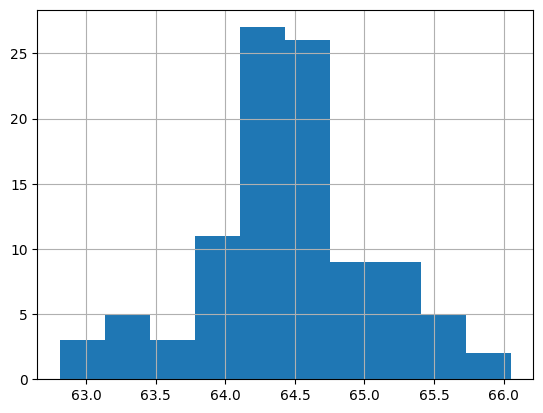

In [20]:
df['EDAD DE JUBILACION'].hist()

In [21]:
df['EDAD DE JUBILACION'].max()

np.float64(66.05188550344754)

In [22]:
df['EDAD DE JUBILACION'].min()

np.float64(62.81055768259291)